### Problem Definition

Any business wants to maximize the number of customers. To achieve this goal, it is important not only to try to attract new ones, but also to retain existing ones. Retaining a client will cost the company less than attracting a new one. In addition, a new client may be weakly interested in business services and it will be difficult to work with him, while old clients already have the necessary data on interaction with the service.

Accordingly, predicting the churn, we can react in time and try to keep the client who wants to leave. Based on the data about the services that the client uses, we can make him a special offer, trying to change his decision to leave the operator. This will make the task of retention easier to implement than the task of attracting new users, about which we do not know anything yet.

You are provided with a dataset from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment.

The task is to analyze the data and predict the churn of users (to identify people who will and will not renew their contract). The work should include the following mandatory items:
    1. Description of the data (with the calculation of basic statistics);
    2. Research of dependencies and formulation of hypotheses;
    3. Building models for predicting the outflow (with justification for the choice of a particular model) based on tested hypotheses and identified relationships;
    4. Comparison of the quality of the obtained models.

#### Importing Libraries

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn

#### Load the Data

In [187]:
telecom_data = pd.read_csv('telecom_users.csv')
telecom_data.head(10)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
5,2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.2,No
6,5260,2495-KZNFB,Female,0,No,No,33,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.65,2989.6,No
7,6001,4367-NHWMM,Female,0,No,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,24.90,24.9,No
8,1480,8898-KASCD,Male,0,No,No,39,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Mailed check,35.55,1309.15,No
9,5137,8016-NCFVO,Male,1,No,No,55,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,116.50,6382.55,No


#### Data Exploration

In [188]:
telecom_data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [189]:
telecom_data.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [190]:
telecom_data.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [191]:
telecom_data = telecom_data.drop(['Unnamed: 0', 'customerID'], axis=1)

In [192]:
#telecom_data.head()

In [193]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
gender              5986 non-null object
SeniorCitizen       5986 non-null int64
Partner             5986 non-null object
Dependents          5986 non-null object
tenure              5986 non-null int64
PhoneService        5986 non-null object
MultipleLines       5986 non-null object
InternetService     5986 non-null object
OnlineSecurity      5986 non-null object
OnlineBackup        5986 non-null object
DeviceProtection    5986 non-null object
TechSupport         5986 non-null object
StreamingTV         5986 non-null object
StreamingMovies     5986 non-null object
Contract            5986 non-null object
PaperlessBilling    5986 non-null object
PaymentMethod       5986 non-null object
MonthlyCharges      5986 non-null float64
TotalCharges        5986 non-null object
Churn               5986 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 935.4+ KB


In [194]:
telecom_data.eq(" ").sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [195]:
telecom_data['TotalCharges'] = telecom_data['TotalCharges'].replace(" ", telecom_data['TotalCharges'].mode()[1])

In [196]:
telecom_data.eq(" ").sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [197]:
telecom_data['TotalCharges'] = telecom_data.TotalCharges.astype(float)

In [198]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
gender              5986 non-null object
SeniorCitizen       5986 non-null int64
Partner             5986 non-null object
Dependents          5986 non-null object
tenure              5986 non-null int64
PhoneService        5986 non-null object
MultipleLines       5986 non-null object
InternetService     5986 non-null object
OnlineSecurity      5986 non-null object
OnlineBackup        5986 non-null object
DeviceProtection    5986 non-null object
TechSupport         5986 non-null object
StreamingTV         5986 non-null object
StreamingMovies     5986 non-null object
Contract            5986 non-null object
PaperlessBilling    5986 non-null object
PaymentMethod       5986 non-null object
MonthlyCharges      5986 non-null float64
TotalCharges        5986 non-null float64
Churn               5986 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 935.4+ KB


In [199]:
telecom_data.isnull().sum() # Checks number of missing values in each column of the data

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [200]:
telecom_data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1526
TotalCharges        5610
Churn                  2
dtype: int64

In [201]:
telecom_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213,2294.255304
std,0.367909,24.516391,30.114702,2274.130224
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.650000,401.587500
50%,0.000000,29.000000,70.400000,1408.575000
75%,0.000000,56.000000,89.900000,3841.500000
max,1.000000,72.000000,118.750000,8684.800000


#### Visualizing Relationships

Text(0, 0.5, 'Churn')

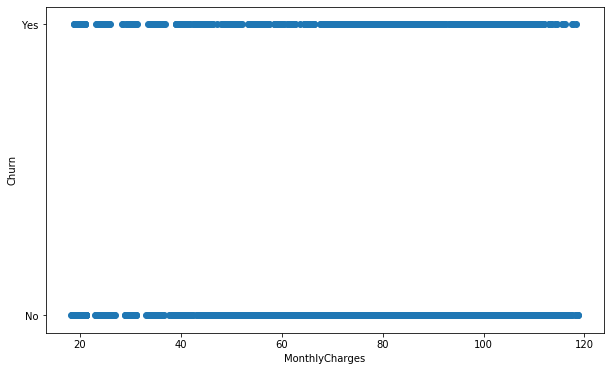

In [202]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.scatter(telecom_data['MonthlyCharges'], telecom_data['Churn'])

plt.xlabel('MonthlyCharges')
plt.ylabel('Churn')

In [203]:
#fig, ax = plt.subplots(figsize=(10, 6))

#plt.scatter(telecom_data['TotalCharges'], telecom_data['Churn'])

#plt.xlabel('TotalCharges')
#plt.ylabel('Churn')
#plt.show()

In [204]:
pd.crosstab(telecom_data['gender'], telecom_data['Churn'])

Churn,No,Yes
gender,,
Female,2145,791
Male,2254,796


In [205]:
pd.crosstab(telecom_data['SeniorCitizen'], telecom_data['Churn'])

Churn,No,Yes
SeniorCitizen,,
0,3835,1185
1,564,402


In [206]:
pd.crosstab(telecom_data['Dependents'], telecom_data['Churn'])

Churn,No,Yes
Dependents,,
No,2889,1306
Yes,1510,281


In [207]:
pd.crosstab(telecom_data['PhoneService'], telecom_data['Churn'])

Churn,No,Yes
PhoneService,,
No,441,149
Yes,3958,1438


In [208]:
pd.crosstab(telecom_data['MultipleLines'], telecom_data['Churn'])

Churn,No,Yes
MultipleLines,,
No,2133,715
No phone service,441,149
Yes,1825,723


In [209]:
telecom_data_corr = telecom_data.corr()

telecom_data_corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.005468,0.219387,0.093801
tenure,0.005468,1.000000,0.256983,0.827748
MonthlyCharges,0.219387,0.256983,1.000000,0.656758
TotalCharges,0.093801,0.827748,0.656758,1.000000


In [210]:

#categorical_cols = ['gender','SeniorCitizen','Partner','Dependents','PhoneService',
# 'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
# 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
# 'Contract','PaperlessBilling','PaymentMethod','Churn']

#from sklearn.preprocessing import LabelEncoder

#label_encoding = LabelEncoder()

#telecom_data[categorical_cols] = telecom_data[categorical_cols].apply(lambda col: label_encoding.fit_transform((col).astype(str)))

In [211]:
#telecom_data.head(5)

In [212]:
#from sklearn.preprocessing import LabelEncoder
#label_encoding = LabelEncoder()

#categorical_cols = ['gender','SeniorCitizen','Partner','Dependents','PhoneService',
# 'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
# 'Contract','PaperlessBilling','PaymentMethod','Churn']

#for i in categorical_cols:
#    telecom_data[i] = label_encoding.fit_transform(telecom_data[i].astype(str))
 #   print(telecom_data)
  #  print(label_encoding.classes_)

In [213]:
#label_encoding.classes_

In [214]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in range(0,telecom_data.shape[1]):
    if telecom_data.dtypes[i]=='object':
        telecom_data[telecom_data.columns[i]] = le.fit_transform(telecom_data[telecom_data.columns[i]])
    print(le.classes_)
telecom_data.head()

['Female' 'Male']
['Female' 'Male']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'No phone service' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['Month-to-month' 'One year' 'Two year']
['No' 'Yes']
['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']
['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']
['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']
['No' 'Yes']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,1734.65,0
1,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,3973.20,0
2,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,2869.85,1
3,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,238.50,0
4,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,119.50,0


In [215]:
telecom_data = telecom_data.sample(frac=1).reset_index(drop=True)

telecom_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,50,1,0,1,0,0,0,0,0,0,2,0,1,70.35,3533.60,0
1,0,0,1,1,35,1,2,2,1,1,1,1,1,1,2,0,0,24.30,821.60,0
2,1,0,0,0,24,1,2,2,1,1,1,1,1,1,1,0,2,24.60,592.65,0
3,1,0,0,0,11,1,0,2,1,1,1,1,1,1,1,0,3,19.50,226.80,0
4,1,1,1,0,16,1,2,1,0,0,0,0,2,0,0,1,1,85.05,1391.15,0


In [216]:
from sklearn.model_selection import train_test_split

X = telecom_data.drop('Churn', axis=1)
Y = telecom_data['Churn']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [217]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(x_train, y_train)

In [218]:
print('Training Score: ', logistic_model.score(x_train, y_train))

Training Score:  0.8049289891395155


In [219]:
y_pred = logistic_model.predict(x_test)

In [220]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})
pred_results

,y_test,y_pred
2871,0,1
1448,0,0
4801,0,1
1841,0,0
434,1,1
...,...,...
2476,0,0
1101,0,0
1350,0,1
5704,0,1


In [221]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [222]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('accuracy_score : ', acc)
print('precision_score : ', prec)
print('recall : ', recall)

accuracy_score :  0.7988313856427379
precision_score :  0.6220735785953178
recall :  0.5923566878980892


In [223]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2

In [224]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [272]:
model = LogisticRegression(solver='liblinear')

rfe = RFE(model, n_features_to_select=3)

In [273]:
fit = rfe.fit(X, Y)

In [274]:
print("Num Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)

Num Features:  3
Selected Features:  [False False False False False False False False  True False False False
 False False  True  True False False False]
Feature Ranking:  [11  2  9  4 13  8  7 12  1  5 10  3 16  6  1  1 14 15 17]


In [275]:
feature_rank = pd.DataFrame({'columns': X.columns, 
                             'ranking': fit.ranking_, 
                             'selected': fit.support_})

feature_rank

,columns,ranking,selected
0,gender,11,False
1,SeniorCitizen,2,False
2,Partner,9,False
3,Dependents,4,False
4,tenure,13,False
5,PhoneService,8,False
6,MultipleLines,7,False
7,InternetService,12,False
8,OnlineSecurity,1,True
9,OnlineBackup,5,False


In [276]:
recursive_feature_names = feature_rank.loc[feature_rank['selected'] == True]

recursive_feature_names

,columns,ranking,selected
8,OnlineSecurity,1,True
14,Contract,1,True
15,PaperlessBilling,1,True


In [277]:
X[recursive_feature_names['columns'].values].head()

,OnlineSecurity,Contract,PaperlessBilling
0,0,2,0
1,1,2,0
2,1,1,0
3,1,1,0
4,0,0,1


In [278]:
recursive_features = X[recursive_feature_names['columns'].values]

In [279]:
def build_model(X, Y, test_frac):
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
    
    model = LogisticRegression(solver='liblinear').fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print("Test_score : ", accuracy_score(y_test, y_pred))

In [261]:
build_model(X, Y, 0.2)

Test_score :  0.8038397328881469


In [290]:
build_model(recursive_features, Y, 0.2)

Test_score :  0.7637729549248747


In [1]:
import calendar

In [6]:
year = 1997
month = 8

In [7]:
print(calendar.month(year, month))

    August 1997
Mo Tu We Th Fr Sa Su
             1  2  3
 4  5  6  7  8  9 10
11 12 13 14 15 16 17
18 19 20 21 22 23 24
25 26 27 28 29 30 31

